In [1]:
# Page No 280
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

In [2]:
# Load Dataset
path = 'data\mcdonalds.csv'
df = pd.read_csv(path)

In [3]:
# First look
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [4]:
binary_matrix = df.iloc[:,:11].values # Converting dataframe to numpy of selected columns
binary_matrix = (binary_matrix == 'Yes').astype('int') # Assigning Yes = 1 and No = 0.
dict(zip(tuple(df.columns[:11]), np.round(binary_matrix.mean(axis=0),2))) # Zipping Columns with mean values

{'yummy': np.float64(0.55),
 'convenient': np.float64(0.91),
 'spicy': np.float64(0.09),
 'fattening': np.float64(0.87),
 'greasy': np.float64(0.53),
 'fast': np.float64(0.9),
 'cheap': np.float64(0.6),
 'tasty': np.float64(0.64),
 'expensive': np.float64(0.36),
 'healthy': np.float64(0.2),
 'disgusting': np.float64(0.24)}

In [5]:
pca = PCA() # Pca object creation
X_pca = pca.fit_transform(binary_matrix) # fit pca
st = X_pca.std(axis=0) # fetch standard daviation of pca.

cumulative_proportion = [] # list for cumulative proportion
cumulative_proportion.append(pca.explained_variance_ratio_[0]) # append value from index 0 of pca.explain_variance_ration
for i in range(1,11):
    cumulative_proportion.append(cumulative_proportion[i-1]+pca.explained_variance_ratio_[i]) # cumulative proportion calculation and append to the list

pca_dict = dict() # create dictionary
# Assign standard daviation, proportion of variance, cumulative proportion to the dictionary
pca_dict['Stand_Dev'] = st
pca_dict['Proportion of Variance'] = pca.explained_variance_ratio_
pca_dict['Cumulative Proportion'] = cumulative_proportion

pd.DataFrame(pca_dict, index=pca.get_feature_names_out()).T # create dataframe from dictionary

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
Stand_Dev,0.756789,0.607246,0.504446,0.398661,0.337289,0.310168,0.289598,0.275027,0.265160,0.248756,0.236821
Proportion of Variance,0.299447,0.192797,0.133045,0.083096,0.059481,0.050300,0.043849,0.039548,0.036761,0.032353,0.029323
Cumulative Proportion,0.299447,0.492244,0.625290,0.708386,0.767866,0.818166,0.862015,0.901563,0.938323,0.970677,1.000000


In [6]:
# The loadings indicate how the original variables are combined to form principal components.
loadings = pd.DataFrame(pca.components_, index=pca.get_feature_names_out(), columns= df.columns[:11]).T
loadings

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
yummy,0.476933,-0.363790,0.304444,0.055162,0.307535,-0.170738,-0.280519,-0.013041,-0.572403,0.110284,-0.045439
convenient,0.155332,-0.016414,0.062515,-0.142425,-0.277608,0.347830,-0.059738,0.113079,0.018465,0.665818,0.541616
spicy,0.006356,-0.018809,0.037019,0.197619,-0.070620,0.355087,0.707637,-0.375934,-0.400280,0.075634,-0.141730
fattening,-0.116232,0.034094,0.322359,-0.354139,0.073405,0.406515,-0.385943,-0.589622,0.160512,0.005338,-0.250910
greasy,-0.304443,0.063839,0.802373,0.253960,-0.361399,-0.209347,0.036170,0.138241,0.002847,-0.008707,-0.001642
fast,0.108493,0.086972,0.064642,-0.097363,-0.107930,0.594632,-0.086846,0.627799,-0.166197,-0.239532,-0.339265
cheap,0.337186,0.610633,0.149310,0.118958,0.128973,0.103241,-0.040449,-0.140060,-0.076069,-0.428087,0.489283
tasty,0.471514,-0.307318,0.287265,-0.002547,0.210899,0.076914,0.360453,0.072792,0.639086,-0.079184,-0.019552
expensive,-0.329042,-0.601286,-0.024397,0.067816,0.003125,0.261342,-0.068385,-0.029539,-0.066996,-0.454399,0.490069
healthy,0.213711,-0.076593,-0.192051,0.763488,-0.287846,0.178226,-0.349616,-0.176303,0.185572,0.038117,-0.157608


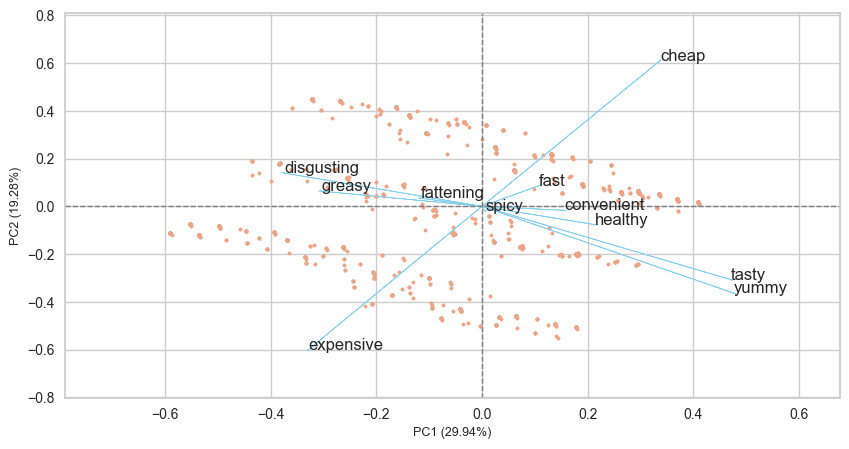

In [7]:
# This part done by googling
x = pd.DataFrame(loadings.values).iloc[:11,:11]
x.columns = loadings.columns[:11]
pca_scores = PCA().fit_transform(x)
loadin = pca.components_

# get 2D biplot
cluster.biplot(cscore= X_pca, loadings=loadin,labels =loadings.index.values , var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

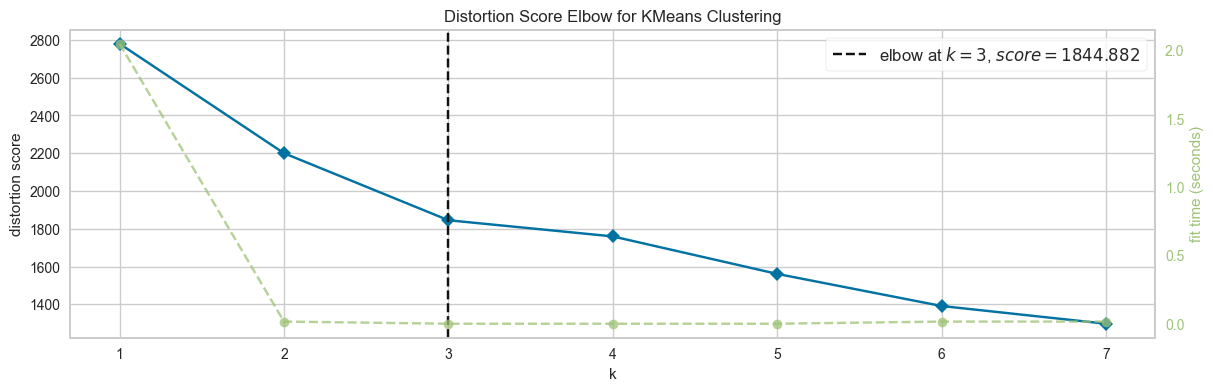

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
plt.figure(figsize=(14,4))
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,8)).fit(binary_matrix)
visualizer.show()

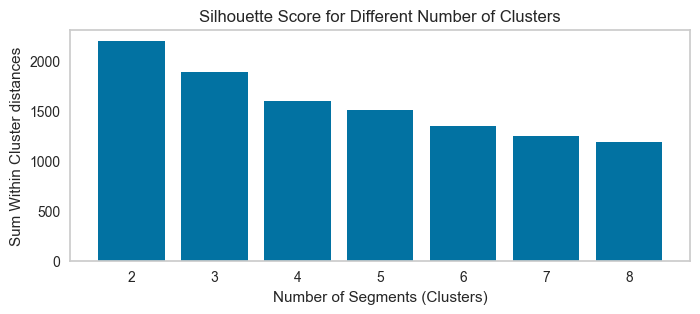

In [9]:
def step_flexclust(data, cluster_range, nrep):
    scores = []
    wcss = []
    
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=1234)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        scores.append(score)
        wcss.append(kmeans.inertia_)
    
    return scores, wcss

# Define the range of clusters
cluster_range = range(2, 9)
# Perform clustering
scores, wcss = step_flexclust(binary_matrix, cluster_range, nrep=10)
# Plotting the average silhouette scores
plt.figure(figsize=(8, 3))
# plt.plot(cluster_range, scores, marker='o')
plt.bar(cluster_range, wcss)
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Segments (Clusters)')
plt.ylabel('Sum Within Cluster distances')
plt.xticks(cluster_range)
plt.grid()
plt.show()

In [10]:
from sklearn.metrics import adjusted_rand_score

In [11]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [12]:
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(binary_matrix)
df['cluster_label']= kmeans.predict(binary_matrix)

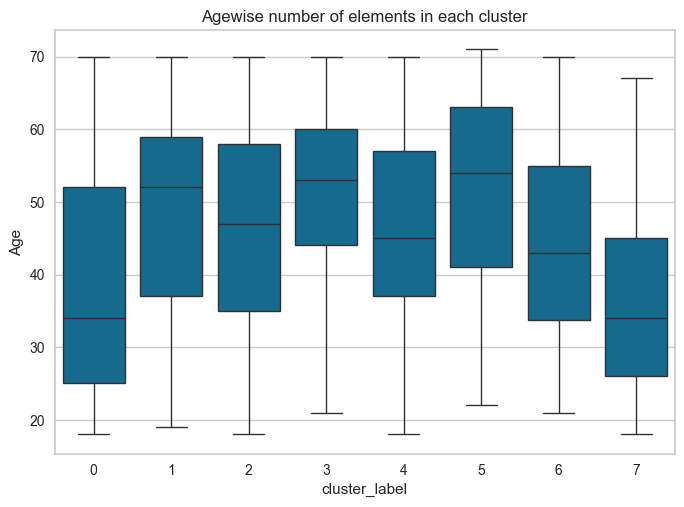

In [13]:
sns.boxplot(df, x='cluster_label', y='Age')
plt.title('Agewise number of elements in each cluster')
plt.show()